# Hotel Booking Cancellations Prediction

## Business Problem Understanding

##### **Context** :   

Sebuah hotel di Portugal mengelola pemesanan kamar hotel dan ingin memprediksi kemungkinan pembatalan pemesanan berdasarkan informasi yang tersedia pada saat pemesanan dilakukan. Dengan mengetahui faktor-faktor yang dapat mempengaruhi keputusan pelanggan untuk membatalkan pemesanan, hotel dapat mengurangi pembatalan yang tidak terduga dan memaksimalkan pendapatan serta efisiensi operasional.

##### **Target** :
- 0 : Tidak membatalkan pemesanan.
- 1 : Membatalkan pemesanan.

##### **Problem Statement** :

Proses pemesanan kamar hotel dapat dipengaruhi oleh banyak faktor, dan pembatalan pemesanan seringkali menambah ketidakpastian dan kerugian finansial bagi hotel. Memprediksi pembatalan membuat hotel dapat mengambil langkah-langkah untuk mengurangi pembatalan dan meningkatkan kepuasan pelanggan. 

Dengan begitu, maka pernyataan masalah yg akan diselesaikan adalah : Bagaimana cara **memprediksi apakah seorang pelanggan akan membatalkan pemesanannya** berdasarkan informasi yang tersedia pada saat reservasi?

##### **Goals** :

Berdasarkan permasalahan tersebut, tujuan utama dari analisis ini adalah untuk :
- Mengembangkan model klasifikasi yang dapat memprediksi kemungkinan pembatalan pemesanan kamar hotel.
- Mengidentifikasi faktor-faktor atau fitur-fitur yang paling berpengaruh terhadap keputusan pelanggan untuk membatalkan pemesanan mereka.
- Memberikan rekomendasi bisnis yang dapat membantu hotel dalam :
    - Mengurangi jumlah pembatalan dengan mengidentifikasi pelanggan yang berisiko membatalkan.
    - Menyesuaikan kebijakan deposit atau strategi pemasaran untuk mengurangi risiko pembatalan.
    - Mengelola permintaan kamar dan ketersediaan kamar lebih efektif berdasarkan pola pembatalan.

##### **Analytic Approach** :

Dalam pendekatan ini, analisis akan dilakukan untuk menemukan pola-pola yang membedakan pelanggan yang cenderung membatalkan pemesanan mereka dengan yang tidak. Data yang tersedia, seperti segmen pasar, jumlah pembatalan sebelumnya, jenis deposit, dan jumlah permintaan khusus, akan dianalisis untuk menentukan variabel-variabel yang dapat digunakan untuk memprediksi kemungkinan pembatalan.

Kemudian, model klasifikasi akan dibangun untuk memprediksi probabilitas seorang pelanggan akan membatalkan pemesanannya, berdasarkan fitur-fitur yang ada dalam dataset. Setelah itu, hasil model ini akan digunakan untuk memberikan rekomendasi yang dapat membantu hotel mengoptimalkan proses pemesanan dan mengurangi pembatalan.

##### **Metric Evaluation** :

| Jenis Error       | Nama Statistik       | Definisi                                                                 | Konsekuensi Bisnis |
|-------------------|----------------------|--------------------------------------------------------------------------|---------------------|
| **Type 1 Error**   | **False Positive**   | Model memprediksi pelanggan akan **membatalkan**, padahal **tidak**      | Kehilangan potensi pendapatan, perlakuan tidak perlu (misal: deposit lebih besar, penolakan pesanan). Dalam jangka panjang, bisa menurunkan kepuasan dan kepercayaan pelanggan. |
| **Type 2 Error**   | **False Negative**   | Model memprediksi pelanggan **tidak** akan membatalkan, padahal **membatalkan** | Kamar kosong mendadak, kerugian operasional karena pembatalan tidak terdeteksi sebelumnya. Ini berdampak langsung pada pendapatan dan efisiensi. |

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membangun model yang menjaga keseimbangan antara False Negative dan False Positive — karena keduanya berdampak pada kerugian finansial dan reputasi layanan. Maka, kita ingin sebanyak mungkin prediksi pembatalan yang benar, dan sesedikit mungkin kesalahan terhadap pelanggan setia.

Oleh karena itu, metrik utama yang akan digunakan untuk mengevaluasi performa model adalah F1-Score untuk kelas 1 karena metrik ini mempertimbangkan Precision dan Recall secara seimbang, dan relevan untuk konteks dua jenis kesalahan yang sama-sama penting untuk dihindari.

Sementara itu, ROC AUC tetap digunakan sebagai metrik tambahan dalam seleksi awal model karena dapat mengukur kemampuan model dalam membedakan pelanggan yang akan membatalkan atau tidak, tanpa bergantung pada threshold tertentu.

## Data Understanding

Data source : https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL.    

Dataset ini berisi informasi pemesanan kamar hotel di Portugal dan mencakup berbagai karakteristik pelanggan serta detail reservasi mereka. Seluruh informasi yang dapat mengidentifikasi pelanggan secara pribadi telah dihapus demi menjaga privasi.

##### **Attribute Information** :
Dataset ini berisi informasi pemesanan kamar hotel, dan setiap baris mewakili satu reservasi. Fokus analisis ini adalah pada fitur-fitur yang dapat digunakan untuk memprediksi pembatalan pemesanan (`is_canceled`).

| Kolom                        | Deskripsi |
|------------------------------|-----------|
| **country**                  | Negara asal pelanggan. |
| **market_segment**           | Segmen pasar tempat pemesanan dilakukan (misalnya: online, offline, corporate). |
| **previous_cancellations**   | Jumlah pemesanan sebelumnya yang pernah dibatalkan oleh pelanggan sebelum pemesanan saat ini. |
| **booking_changes**          | Jumlah perubahan yang dilakukan terhadap pemesanan dari saat dicatat hingga check-in atau pembatalan. |
| **deposit_type**             | Jenis deposit yang digunakan untuk menjamin pemesanan. |
| **days_in_waiting_list**     | Lama hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi ke pelanggan. |
| **customer_type**            | Jenis pelanggan berdasarkan pola pemesanannya. |
| **reserved_room_type**       | Kode jenis kamar yang dipesan (kode disamarkan demi anonimitas). |
| **required_car_parking_space** | Jumlah tempat parkir yang diminta oleh pelanggan. |
| **total_of_special_request** | Jumlah permintaan khusus dari pelanggan (misalnya: tempat tidur twin, lantai tinggi). |
| **is_canceled**              | Status pembatalan pemesanan (1 = dibatalkan, 0 = tidak dibatalkan). |

In [2]:
# Library

import pandas as pd
import numpy as np

# Cleaning & Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, roc_auc_score, make_scorer, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone

# Imbalance Dataset
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Saving the Model
import pickle

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset
df = pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


## Data Cleaning & EDA

In [5]:
# Cek duplikat 
display(df.duplicated().sum())
print('Persentase duplikat dalam data :', (df.duplicated().sum() / len(df)) * 100)

# Menampilkan duplikat
df.value_counts().sort_values(ascending=False).head(10)

73371

Persentase duplikat dalam data : 87.79270817129934


country  market_segment  previous_cancellations  booking_changes  deposit_type  days_in_waiting_list  customer_type    reserved_room_type  required_car_parking_spaces  total_of_special_requests  is_canceled
PRT      Groups          0                       0                Non Refund    0                     Transient        A                   0                            0                          1              4080
         Offline TA/TO   0                       0                Non Refund    0                     Transient        A                   0                            0                          1              1851
         Groups          0                       0                No Deposit    0                     Transient-Party  A                   0                            0                          1              1047
         Online TA       0                       0                No Deposit    0                     Transient        A                   0        

Sebagian besar duplikat bukanlah kebetulan. Data duplikat kemungkinan besar adalah rekaman booking massal dari paket perjalanan agen yang sama.

Duplikat dalam data pemesanan hotel mencerminkan pola perilaku pelanggan berulang, dan menghapusnya berarti mengabaikan informasi frekuensi yang sangat relevan dalam membangun model prediktif yang akurat, sehingga duplikat akan dipertahankan.

### Categorical Features

In [6]:
# Cek unique value
categorical_columns = ['country', 'deposit_type', 'customer_type', 'market_segment', 'reserved_room_type']

listCat = []
for col in categorical_columns:
    listCat.append([col,
                    df[col].dtype,
                    df[col].isnull().sum(),
                    df[col].nunique(),
                    list(df[col].drop_duplicates().values),
                    df[col].value_counts().to_dict()])
    
dfCatDesc = pd.DataFrame(columns=['Column', 'Data Type', 'Missing Count', 'Unique Count', 'Unique Values', 'Value Count'],
                         data=listCat)
dfCatDesc

,Column,Data Type,Missing Count,Unique Count,Unique Values,Value Count
0,country,object,351,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B...","{'PRT': 34097, 'GBR': 8495, 'FRA': 7307, 'ESP'..."
1,deposit_type,object,0,3,"[No Deposit, Non Refund, Refundable]","{'No Deposit': 73352, 'Non Refund': 10111, 'Re..."
2,customer_type,object,0,4,"[Transient-Party, Transient, Contract, Group]","{'Transient': 62732, 'Transient-Party': 17536,..."
3,market_segment,object,0,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor...","{'Online TA': 39460, 'Offline TA/TO': 17025, '..."
4,reserved_room_type,object,0,10,"[A, E, D, F, B, G, C, H, L, P]","{'A': 60041, 'D': 13526, 'E': 4649, 'F': 2037,..."


- Kolom `country` :        
Missing value hanya ada di kolom ini, dan jumlahnya sangat kecil dari keseluruhan data, sehingga tidak mengganggu distribusi secara umum. Menghapusnya mungkin akan menghilangkan informasi penting yang mungkin berharga, terutama kolom is_canceled sebagai targetnya. Karena itu, lebih baik mengimputasinya dengan modus (cara paling umum yang digunakan untuk data kategorikal).
    > Note : Imputasi dengan fillna pada EDA hanya untuk melihat distribusi data, dan imputasi akan dilakukan lagi selama preprocessing, untuk menghindari risiko kebocoran data jika dilakukan sebelum pemisahan data test dan data train.       

    Selain itu, kolom country tersebut berisi kode negara ISO 3166-1 alpha-3 yang terdiri dari tiga huruf, namun sepertinya ada kode yang tidak valid sehingga harus diubah (CN menjadi CHN untuk tiongkok, dan TMP-kode lama Timor Leste-menjadi TLS).     
    Lalu, negara dengan value count dibawah 100 akan digabungkan kedalam satu kategori untuk mencegah noise dan overfitting.


In [7]:
# Isi missing dengan mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [8]:
valid_country_codes = {country.alpha_3 for country in pycountry.countries}
invalid = df[~df['country'].isin(valid_country_codes)]['country'].unique()
invalid

array(['CN', 'TMP'], dtype=object)

In [9]:
# Ubah semua kode menjadi alpha-3
alpha2_to_alpha3 = {country.alpha_2: country.alpha_3 for country in pycountry.countries}

def convert_to_alpha3(code):
    if pd.isna(code):
        return code # alpha-3 akan tetap
    code = code.upper()
    if code in alpha2_to_alpha3:
        return alpha2_to_alpha3[code]
    return code  # mengembalikan kode selain alpha-2

df['country'] = df['country'].apply(convert_to_alpha3)

In [10]:
# Ganti TMP jadi TLS
df['country'] = df['country'].replace('TMP', 'TLS')

In [11]:
# Memastikan semua kode sudah valid
valid_country_codes = {country.alpha_3 for country in pycountry.countries}
invalid = df[~df['country'].isin(valid_country_codes)]['country'].unique()
invalid

array([], dtype=object)

In [12]:
# Binning negara dengan value count di bawah 100
country_counts = df['country'].value_counts()
threshold = 100
common_countries = country_counts[country_counts >= threshold].index
df['country'] = df['country'].apply(lambda x: x if x in common_countries else 'Other')

- Kolom `market_segment` :    
Unique value berupa :   
    - Offline TA/TO : Travel Agent atau Tour Operator offline.
    - Online TA : Online travel agents.
    - Direct : Booking langsung oleh tamu.
    - Groups : Booking dalam grup besar.
    - Corporate : Booking melalui perusahaan.
    - Complementary : Tamu tidak membayar (misalnya hadiah, voucher).
    - Aviation : Booking dari maskapai (biasanya tamu transit).
    - Undefined : Tidak terdefinisi / tidak tercatat dengan jelas.

- Kolom `deposit_type` :       
Unique value berupa : 
    - No Deposit : Tamu tidak perlu membayar deposit saat memesan.
    - Non Refund : Ada biaya yang dibayarkan di awal dan tidak dapat dikembalikan (jika dibatalkan).
    - Refundable : Deposit dibayarkan, tetapi bisa dikembalikan jika dibatalkan sesuai kebijakan.

  Distribusi semua valuenya cukup merata.

- Kolom `customer_type` :  
  Unique valuenya berupa :  
  - Transient : Tamu individu.  
  - Transient-Party : Tamu individu tapi datang bersama grup kecil (misalnya keluarga).  
  - Contract : Pemesanan melalui perusahaan atau kontrak jangka panjang (seperti klien korporat).  
  - Group : Tamu dalam grup besar yang dipesan secara kolektif.  

  Distribusi semua valuenya cukup merata.

- Kolom `reserved_room_type` :      
Kolom ini adalah kolom kategorikal yang butuh encoding. Dari distribusinya, ada kategori dengan frekuensi yang sangat rendah, yaitu (P) dengan jumlah 9 pemesanan dan (L) berjumlah 3 pemesanan, yang akan digabungkan ke dalam kategori yang lebih umum untuk memudahkan model belajar dari kategori ini.

In [13]:
# Binning value count rendah menjadi satu kategori
df['reserved_room_type'] = df['reserved_room_type'].apply(lambda x: x if x in ['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H'] else 'Other')

### Numerical Features

In [14]:
# Cek Unique Value
numerical_columns = ['previous_cancellations','booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

listNum = []
for col in numerical_columns:
    listNum.append([col,
                    df[col].dtype,
                    df[col].isnull().sum(),
                    df[col].nunique(),
                    list(df[col].drop_duplicates().values),
                    df[col].value_counts().to_dict(),
                    df[col].describe()])
    
dfNumDesc = pd.DataFrame(columns=['Column', 'Data Type', 'Missing Count', 'Unique Count', 'Unique Values', 'Value Count', 'Describe'],
                         data=listNum)
dfNumDesc

,Column,Data Type,Missing Count,Unique Count,Unique Values,Value Count,Describe
0,previous_cancellations,int64,0,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,...","{0: 79060, 1: 4207, 2: 86, 3: 46, 24: 33, 11: ...",count 83573.000000 mean 0.086798 st...
1,booking_changes,int64,0,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,...","{0: 70873, 1: 8963, 2: 2652, 3: 639, 4: 260, 5...",count 83573.000000 mean 0.220897 st...
2,days_in_waiting_list,int64,0,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31...","{0: 80988, 39: 166, 58: 104, 44: 93, 31: 93, 4...",count 83573.000000 mean 2.330561 st...
3,required_car_parking_spaces,int64,0,5,"[0, 1, 2, 8, 3]","{0: 78346, 1: 5202, 2: 22, 8: 2, 3: 1}",count 83573.000000 mean 0.062999 st...
4,total_of_special_requests,int64,0,6,"[0, 2, 1, 3, 4, 5]","{0: 49188, 1: 23214, 2: 9120, 3: 1784, 4: 236,...",count 83573.000000 mean 0.573211 st...


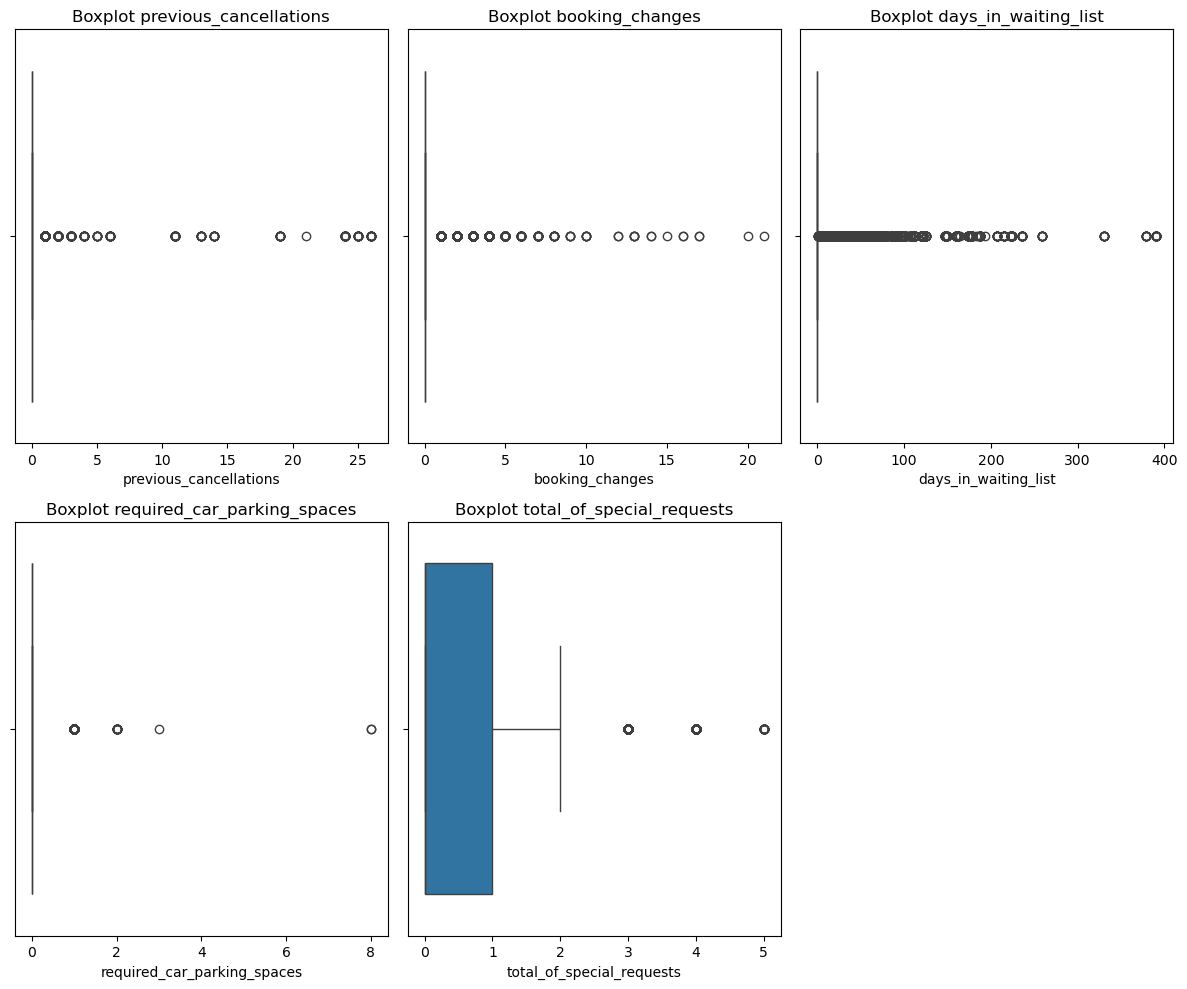

In [15]:
# Cek outlier 
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

- Kolom `previous_cancellations` :     
Unique valuenya punya distribusi yang sangat tidak seimbang. Nilai dari 2 ke atas jumlahnya sangat sedikit dibandingkan mayoritas di (0) atau (1) yang masih umum, sehingga lebih baik dibinning untuk mengurangi noise dan menstabilkan model.

In [16]:
# Binning value count di atas 2 menjadi 2
df['previous_cancellations'] = df['previous_cancellations'].apply(lambda x: x if x <= 1 else 2)

- Kolom `booking_changes` :      
Distribusi antar unique value sangat tidak seimbang, sehingga clipping dibutuhkan menjaga distribusi lebih stabil.

In [17]:
# Clipping batas maksimal di (4)
df['booking_changes'] = df['booking_changes'].clip(upper=4)

- Kolom `days_in_waiting_list` :    
Karena ada sangat banyak outlier, mengganti kolom ini menjadi kolom kategorikal dengan hasil binning bisa meningkatkan interpretabilitas daripada kolom numerik kontinu. Menyimpan kedua kolom ditakutkan akan berpotensi duplikasi informasi dan menyebabkan masalah seperti multikolinearitas. 

In [18]:
def bin_waiting_list(days):
    if days == 0:
        return 'No Waiting'
    elif 1 <= days <= 7:
        return 'Short Wait (1–7)'
    elif 8 <= days <= 30:
        return 'Medium Wait (8–30)'
    else:
        return 'Long Wait (>30)'

df['days_in_waiting_list'] = df['days_in_waiting_list'].apply(bin_waiting_list)

- Kolom `required_car_parking_spaces` :       
Sebagian besar pelanggan tidak meminta parkir (0). Nilai (1) cukup umum, sedangkan (2), (3), dan (8) sangat jarang terjadi (kemungkinan kasus khusus seperti grup atau keluarga besar), sehingga lebih baik dibinning menjadi >=2 untuk menjaga kesederhanaan dan stabilitas model.

In [19]:
# Cek customer type dengan required_car_parking_spaces 2, 3, dan 8
df_filtered = df[df['required_car_parking_spaces'].isin([2, 3, 8])]
df_filtered[['required_car_parking_spaces', 'customer_type']]

,required_car_parking_spaces,customer_type
789,2,Transient-Party
1044,2,Transient
1467,2,Transient
15501,2,Transient-Party
21979,8,Transient-Party
23899,2,Transient
26977,3,Transient-Party
30674,2,Transient
34346,2,Transient
35802,8,Transient-Party


In [20]:
# Binning nilai > 2 menjadi 2
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].apply(lambda x: x if x <= 1 else 2)

- Kolom `total_of_special_requests` :   
Unique value sudah sesuai, dan outlier masih wajar.

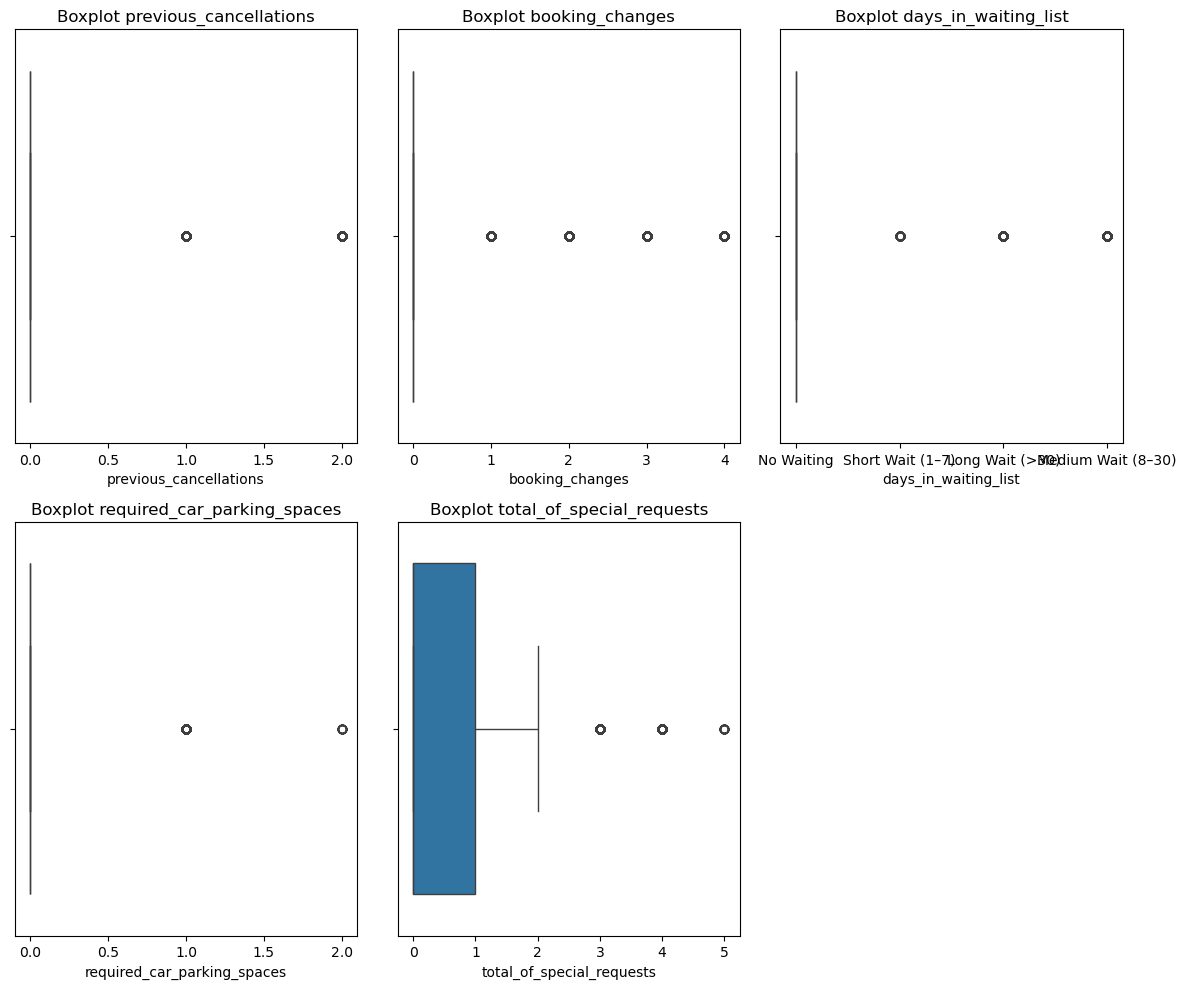

In [21]:
# Cek outlier 
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Data sudah bersih dari outlier.

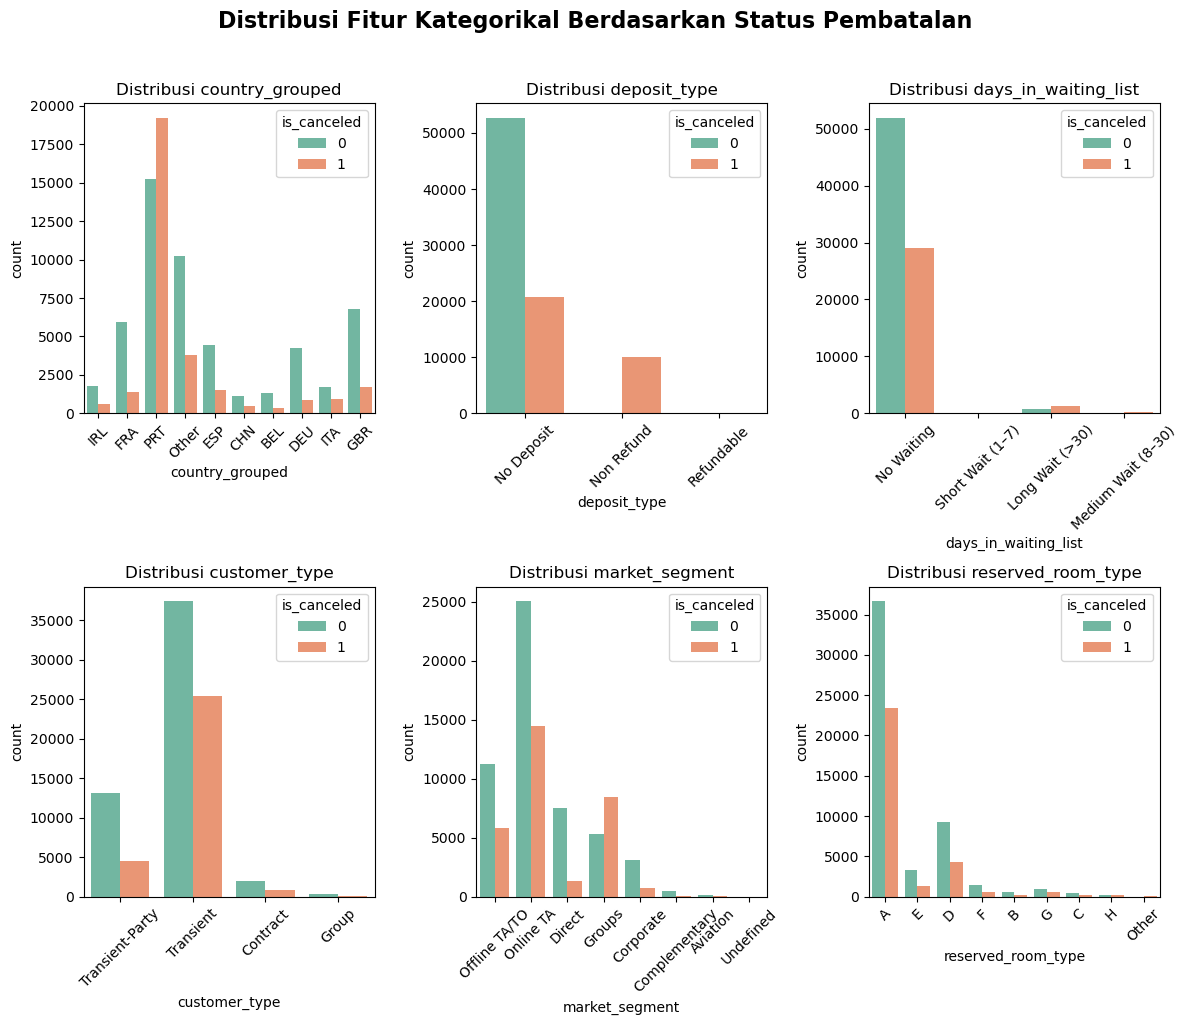

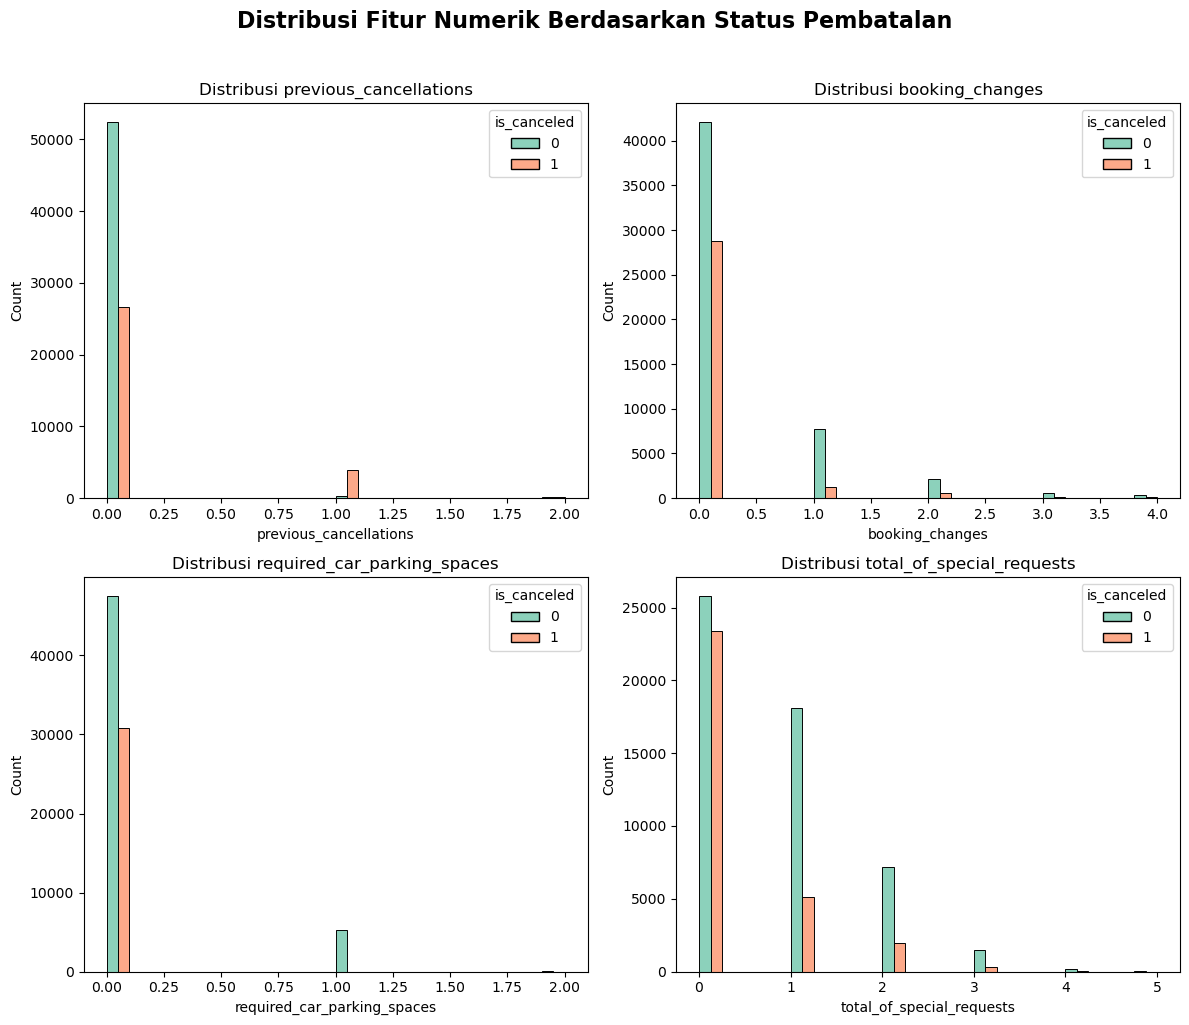

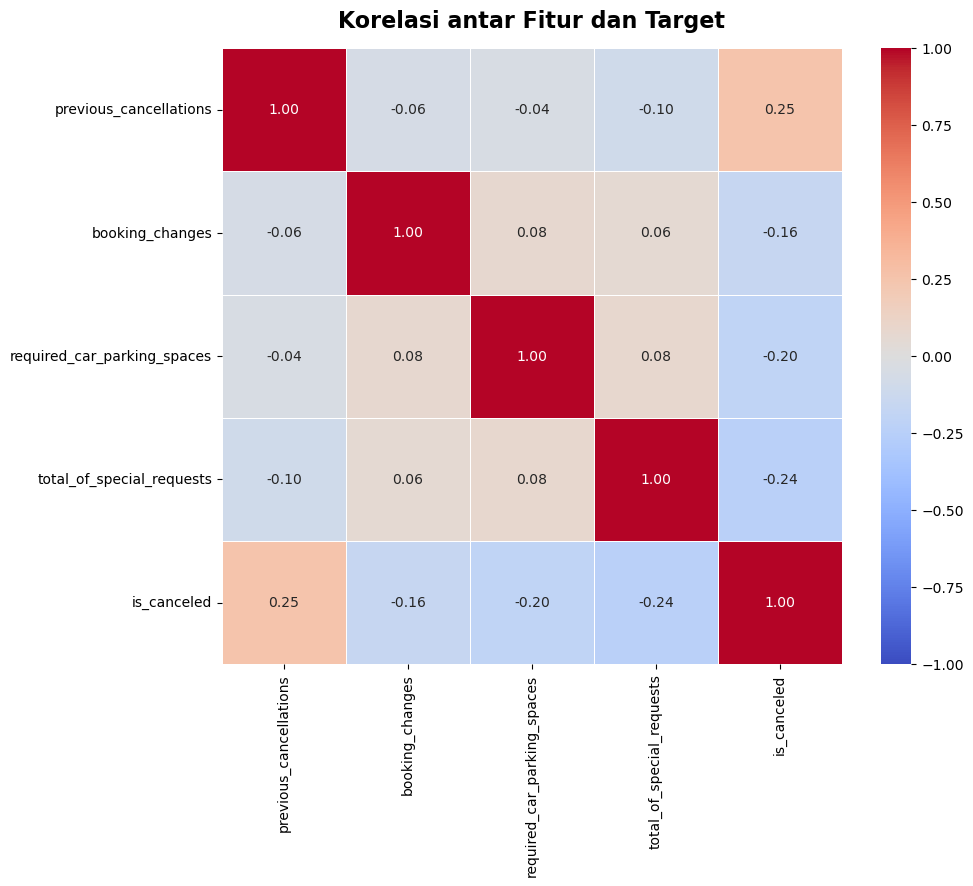

In [22]:
# Visualisasi kolom kategorikal
top_countries = df['country'].value_counts().nlargest(10).index
df['country_grouped'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

categorical_columns = ['country_grouped', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'market_segment', 'reserved_room_type']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='is_canceled', data=df, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.suptitle('Distribusi Fitur Kategorikal Berdasarkan Status Pembatalan', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

df.drop(columns=['country_grouped'], inplace=True) # hapus kolom agar fitur tidak bertambah

# Visualisasi kolom numerik
numerical_columns = ['previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='is_canceled', kde=False, bins=20, multiple='dodge', palette='Set2')
    plt.title(f'Distribusi {col}')
plt.suptitle('Distribusi Fitur Numerik Berdasarkan Status Pembatalan', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Korelasi antar kolom numerik dengan target 'is_canceled'
correlation_matrix = df[numerical_columns + ['is_canceled']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Korelasi antar Fitur dan Target', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [23]:
# Cek imbalance target
df['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    63.172316
1    36.827684
Name: proportion, dtype: float64

Distribusi tiap kolom sudah lebih terkontrol dan bersih dari outlier, dan overfitting dari nilai ekstrem bisa diminimalkan. Correlation matrix juga menunjukkan tidak ada multikolinearitas. Target tidak terlalu imbalance, tapi masih bisa bekerja cukup baik tanpa perlu penanganan khusus untuk imbalance. Dengan demikian, data sudah siap digunakan.

## Data Preparation

In [24]:
# Fitur & Target
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2021)

In [26]:
# Preprocessing 
frequency_cols = ['country']
ordinal_cols = ['days_in_waiting_list'] 
onehot_cols = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type'] 
numeric_cols = ['previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']

# Pipeline fitur kategorikal
def frequency_encode_country(X):
    series = pd.Series(X.ravel())
    freq = series.value_counts()
    return series.map(freq).values.reshape(-1, 1)

frequency_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='most_frequent')),
    ('frequency', FunctionTransformer(frequency_encode_country, validate=False))
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[['No Waiting', 'Short Wait (1–7)', 'Medium Wait (8–30)', 'Long Wait (>30)']]))
])

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline fitur numerik
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline preprocessing
preprocessor = ColumnTransformer([
    ('frequency', frequency_pipeline, frequency_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('onehot', onehot_pipeline, onehot_cols),
    ('numeric', numeric_pipeline, numeric_cols)
])

## Modeling & Evaluation

In [27]:
# Definisikan model
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

### Model Benchmarking : K-Fold

In [28]:
models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

f1_class1_means = []
f1_class1_stds = []
roc_auc_means = []
roc_auc_stds = []

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    f1_scores = []
    auc_scores = []
    
    for train_index, val_index in skfold.split(X_train, y_train):
        
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
        estimator = Pipeline([
            ('preprocess', preprocessor),
            ('model', model)
        ])
        estimator.fit(X_tr, y_tr)
        
        y_pred = estimator.predict(X_val)
        y_proba = estimator.predict_proba(X_val)[:, 1]

        f1_scores.append(f1_score(y_val, y_pred, pos_label=1))
        auc_scores.append(roc_auc_score(y_val, y_proba))

    f1_class1_means.append(np.mean(f1_scores))
    f1_class1_stds.append(np.std(f1_scores))
    roc_auc_means.append(np.mean(auc_scores))
    roc_auc_stds.append(np.std(auc_scores))

results_df = pd.DataFrame({
    'Model': model_names,
    'F1 Mean (Class 1)': f1_class1_means,
    'F1 Std': f1_class1_stds,
    'ROC AUC Mean': roc_auc_means,
    'ROC AUC Std': roc_auc_stds
})
results_df.set_index('Model').round(3).sort_values(by='F1 Mean (Class 1)', ascending=False)

[LightGBM] [Info] Number of positive: 19698, number of negative: 33788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368283 -> initscore=-0.539589
[LightGBM] [Info] Start training from score -0.539589
[LightGBM] [Info] Number of positive: 19697, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 28
[LightGBM] [Info] [b

,F1 Mean (Class 1),F1 Std,ROC AUC Mean,ROC AUC Std
Model,,,,
LightGBM,0.683,0.006,0.837,0.004
XGBoost,0.679,0.006,0.836,0.004
Random Forest,0.660,0.004,0.816,0.002
Decision Tree,0.640,0.005,0.792,0.006
Logistic Regression,0.595,0.009,0.843,0.002
KNN,0.532,0.011,0.693,0.010


Pada data train yang dilatih, model LightGBM adalah model terbaik berdasarkan mean dan std F1 Score dan ROC AUC, mengindikasikan performanya lebih stabil dan konsisten. XGBoost menyusul, dengan selisih yg sangat kecil.

### Resampling with K-Fold Cross Validation

In [29]:
# Resampling dengan SMOTE
f1_class1_means = []
f1_class1_stds = []
roc_auc_means = []
roc_auc_stds = []

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    f1_scores = []
    auc_scores = []
    
    for train_index, val_index in skfold.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        estimator = ImbPipeline([
            ('preprocess', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('model', model)
        ])
        
        estimator.fit(X_tr, y_tr)
        y_pred = estimator.predict(X_val)
        y_proba = estimator.predict_proba(X_val)[:, 1]

        f1_scores.append(f1_score(y_val, y_pred, pos_label=1))
        auc_scores.append(roc_auc_score(y_val, y_proba))

    f1_class1_means.append(np.mean(f1_scores))
    f1_class1_stds.append(np.std(f1_scores))
    roc_auc_means.append(np.mean(auc_scores))
    roc_auc_stds.append(np.std(auc_scores))

results_df_resampled_smote = pd.DataFrame({
    'Model': model_names,
    'F1 Mean (Class 1)': f1_class1_means,
    'F1 Std': f1_class1_stds,
    'ROC AUC Mean': roc_auc_means,
    'ROC AUC Std': roc_auc_stds
})
results_df_resampled_smote.set_index('Model').round(3).sort_values(by='F1 Mean (Class 1)', ascending=False)

[LightGBM] [Info] Number of positive: 33788, number of negative: 33788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 67576, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33789, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 67578, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

,F1 Mean (Class 1),F1 Std,ROC AUC Mean,ROC AUC Std
Model,,,,
Logistic Regression,0.693,0.002,0.843,0.002
LightGBM,0.689,0.002,0.840,0.004
XGBoost,0.687,0.003,0.841,0.005
Random Forest,0.672,0.004,0.816,0.002
Decision Tree,0.654,0.004,0.791,0.003
KNN,0.534,0.012,0.689,0.011


In [30]:
# Resampling dengan SMOTEENN
f1_class1_means = []
f1_class1_stds = []
roc_auc_means = []
roc_auc_stds = []

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    f1_scores = []
    auc_scores = []
    
    for train_index, val_index in skfold.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        estimator = ImbPipeline([
            ('preprocess', preprocessor),
            ('smoteenn', SMOTEENN(random_state=42)),
            ('model', model)
        ])
        
        estimator.fit(X_tr, y_tr)
        y_pred = estimator.predict(X_val)
        y_proba = estimator.predict_proba(X_val)[:, 1]

        f1_scores.append(f1_score(y_val, y_pred, pos_label=1))
        auc_scores.append(roc_auc_score(y_val, y_proba))

    f1_class1_means.append(np.mean(f1_scores))
    f1_class1_stds.append(np.std(f1_scores))
    roc_auc_means.append(np.mean(auc_scores))
    roc_auc_stds.append(np.std(auc_scores))

results_df_resampled_smoteenn = pd.DataFrame({
    'Model': model_names,
    'F1 Mean (Class 1)': f1_class1_means,
    'F1 Std': f1_class1_stds,
    'ROC AUC Mean': roc_auc_means,
    'ROC AUC Std': roc_auc_stds
})

results_df_resampled_smoteenn.set_index('Model').round(3).sort_values(by='F1 Mean (Class 1)', ascending=False)

[LightGBM] [Info] Number of positive: 16124, number of negative: 19227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 35351, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.456112 -> initscore=-0.176007
[LightGBM] [Info] Start training from score -0.176007
[LightGBM] [Info] Number of positive: 16395, number of negative: 20642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 37037, number of used features: 28
[LightGBM] [Info] [b

,F1 Mean (Class 1),F1 Std,ROC AUC Mean,ROC AUC Std
Model,,,,
Logistic Regression,0.688,0.005,0.833,0.001
LightGBM,0.667,0.010,0.815,0.004
XGBoost,0.663,0.014,0.819,0.008
Random Forest,0.653,0.010,0.762,0.011
Decision Tree,0.643,0.018,0.726,0.012
KNN,0.377,0.023,0.596,0.009


Namun, setelah resampling (baik SMOTE maupun SMOTEENN), Logistic Regretion mengalahkan LightGBM dengan menunjukkan performa yg lebih baik pada F1 Score maupun ROC AUCnya. Oleh karena itu, mari kita bandingkan hasil keseluruhan metrik dengan dan tanpa resampling.

In [39]:
# Gabungan hasil resampling
comparison_df = pd.DataFrame()
comparison_df['Model'] = results_df['Model']

comparison_df['F1 Mean'] = results_df['F1 Mean (Class 1)']
comparison_df['F1 Mean (SMOTE)'] = results_df_resampled_smote['F1 Mean (Class 1)']
comparison_df['F1 Mean (SMOTEENN)'] = results_df_resampled_smoteenn['F1 Mean (Class 1)']

comparison_df['F1 Std'] = results_df['F1 Std']
comparison_df['F1 Std (SMOTE)'] = results_df_resampled_smote['F1 Std']
comparison_df['F1 Std (SMOTEENN)'] = results_df_resampled_smoteenn['F1 Std']

comparison_df['AUC Mean'] = results_df['ROC AUC Mean']
comparison_df['AUC Mean (SMOTE)'] = results_df_resampled_smote['ROC AUC Mean']
comparison_df['AUC Mean (SMOTEENN)'] = results_df_resampled_smoteenn['ROC AUC Mean']

comparison_df['AUC Std'] = results_df['ROC AUC Std']
comparison_df['AUC Std (SMOTE)'] = results_df_resampled_smote['ROC AUC Std']
comparison_df['AUC Std (SMOTEENN)'] = results_df_resampled_smoteenn['ROC AUC Std']

comparison_df.round(3).sort_values(by='F1 Mean', ascending=False)

,Model,F1 Mean,F1 Mean (SMOTE),F1 Mean (SMOTEENN),F1 Std,F1 Std (SMOTE),F1 Std (SMOTEENN),AUC Mean,AUC Mean (SMOTE),AUC Mean (SMOTEENN),AUC Std,AUC Std (SMOTE),AUC Std (SMOTEENN)
5,LightGBM,0.683,0.689,0.667,0.006,0.002,0.010,0.837,0.840,0.815,0.004,0.004,0.004
4,XGBoost,0.679,0.687,0.663,0.006,0.003,0.014,0.836,0.841,0.819,0.004,0.005,0.008
3,Random Forest,0.660,0.672,0.653,0.004,0.004,0.010,0.816,0.816,0.762,0.002,0.002,0.011
2,Decision Tree,0.640,0.654,0.643,0.005,0.004,0.018,0.792,0.791,0.726,0.006,0.003,0.012
0,Logistic Regression,0.595,0.693,0.688,0.009,0.002,0.005,0.843,0.843,0.833,0.002,0.002,0.001
1,KNN,0.532,0.534,0.377,0.011,0.012,0.023,0.693,0.689,0.596,0.010,0.011,0.009


Meskipun Logistic Regression memiliki mean F1 dan AUC tertinggi, F1 Mean-nya rendah sebelum resampling. Ini menunjukkan bahwa model mungkin bias terhadap kelas mayoritas (pelanggan yang tidak membatalkan). Meskipun resampling meningkatkan F1 Mean, LightGBM tetap memberikan performa yang lebih baik secara keseluruhan.

Untuk kasus prediksi pembatalan pemesanan hotel, **LightGBM** adalah pilihan terbaik karena memberikan keseimbangan terbaik antara precision, recall, dan kemampuan diskriminasi, serta memiliki performa yang stabil. Sedangkan untuk resampling, secara umum **SMOTE** memberikan peningkatan kinerja yang lebih baik dan lebih stabil dibandingkan SMOTEENN. SMOTEENN cenderung menurunkan kinerja.

### Hyperparameter Tuning

In [32]:
# Hyperparameter tuning dengan RandomizedSearchCV
pipeline = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LGBMClassifier(random_state=42))
])

param_distributions = {
    'model__num_leaves': [31, 50, 100],  # Hyperparameter untuk jumlah daun di setiap pohon
    'model__max_depth': [-1, 5, 10],  # Depth maksimum dari pohon
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [50, 100, 200],  # Jumlah estimators (pohon)
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=skfold,  # pakai StratifiedKFold dari benchmarking
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best F1 Score (mean CV):", random_search.best_score_)

# Evaluasi model terbaik
best_model = random_search.best_estimator_

# F1 Score per fold
f1_scores = cross_val_score(best_model, X_train, y_train, cv=skfold, scoring=make_scorer(f1_score, pos_label=1))
print(f"Mean F1 Score: {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")

# ROC AUC per fold
auc_scores = cross_val_score(best_model, X_train, y_train, cv=skfold, scoring='roc_auc')
print(f"Mean ROC AUC: {auc_scores.mean():.3f} ± {auc_scores.std():.3f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 84472, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [33]:
# Data hasil sebelum tuning (baseline LightGBM SMOTE)
gbm_metrics = results_df_resampled_smote[results_df_resampled_smote['Model'] == 'LightGBM']
baseline_metrics = {
    'Model': 'LightGBM SMOTE (Before Tuning)',
    'F1 Mean': gbm_metrics['F1 Mean (Class 1)'].values[0], 
    'F1 Std': gbm_metrics['F1 Std'].values[0], 
    'AUC Mean': gbm_metrics['ROC AUC Mean'].values[0],  
    'AUC Std': gbm_metrics['ROC AUC Std'].values[0]    
}

# Data hasil setelah tuning
tuned_metrics = {
    'Model': 'LightGBM SMOTE (After Tuning)',
    'F1 Mean': f1_scores.mean(),
    'F1 Std': f1_scores.std(),
    'AUC Mean': auc_scores.mean(),
    'AUC Std': auc_scores.std()
}

comparison_df = pd.DataFrame([baseline_metrics, tuned_metrics]).round(3)
comparison_df

,Model,F1 Mean,F1 Std,AUC Mean,AUC Std
0,LightGBM SMOTE (Before Tuning),0.689,0.002,0.840,0.004
1,LightGBM SMOTE (After Tuning),0.694,0.003,0.836,0.002


Tuning berhasil meningkatkan F1 Score, yang menunjukkan peningkatan dalam keseimbangan antara recall dan precision model, meskipun AUC sedikit menurun.

Secara keseluruhan, model yang dituning (LightGBM setelah tuning) menunjukkan performa yang lebih konsisten, dengan standar deviasi yang lebih kecil pada kedua metrik (F1 dan AUC).

### Saving the Model with Pickle

In [34]:
with open('lightgbm_smote_tuned.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model berhasil disimpan sebagai 'lightgbm_smote_tuned.pkl'")

Model berhasil disimpan sebagai 'lightgbm_smote_tuned.pkl'


### Feature Importances


Top 10 Features (Based on Importance):
                         Feature     Importance
11       deposit_type_Non Refund  114298.679196
0                        country   35740.037651
28   required_car_parking_spaces   22817.486607
8       market_segment_Online TA   22646.252606
29     total_of_special_requests   20983.807535
15       customer_type_Transient   11802.935308
26        previous_cancellations   11620.076857
27               booking_changes    6116.811234
7   market_segment_Offline TA/TO    4398.333799
4       market_segment_Corporate    3689.297695


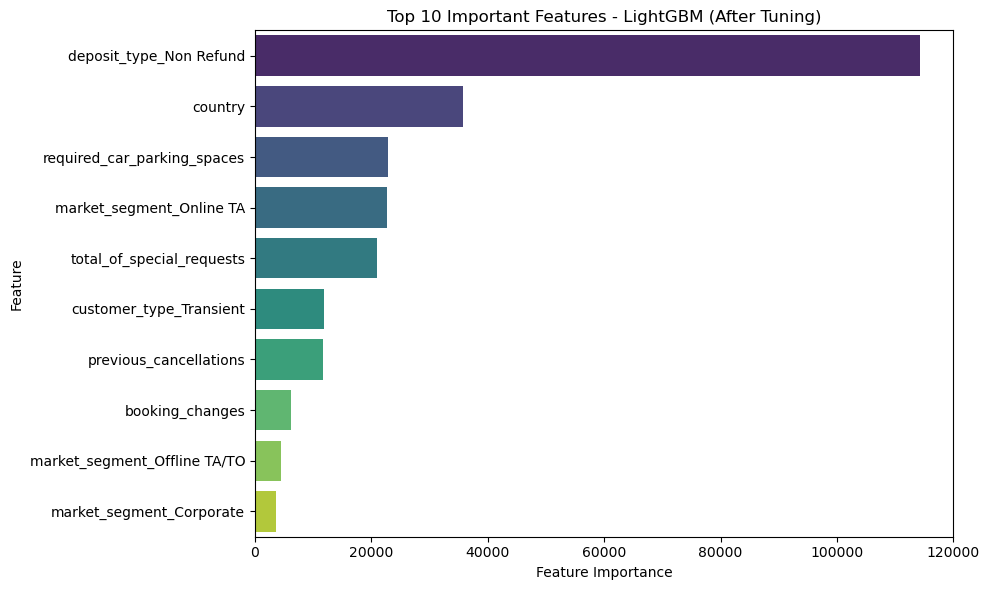

In [35]:
# Ambil fitur setelah melalui preprocessing
preprocessor = best_model.named_steps['preprocess']

frequency_features = preprocessor.transformers_[0][2]
ordinal_features = preprocessor.transformers_[1][2]

onehot_encoder = preprocessor.transformers_[2][1].named_steps['onehot']
onehot_original = preprocessor.transformers_[2][2] 
onehot_features = onehot_encoder.get_feature_names_out(onehot_original)

numeric_features = preprocessor.transformers_[3][2]

feature_names = np.concatenate([
    frequency_features,
    ordinal_features,
    onehot_features,
    numeric_features
])

# Feature importance dari model lightGBM setelah tuning
gbm_tuned = best_model.named_steps['model']
feature_importance = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': gbm_tuned.booster_.feature_importance(importance_type='gain')
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 10 fitur terpenting
print("\nTop 10 Features (Based on Importance):")
print(feature_importance.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Important Features - LightGBM (After Tuning)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Barplot menunjukkan bahwa fitur seperti deposit_type_Non Refund, country dan  market_segment_Online TA sangat berpengaruh terhadap prediksi pembatalan. Ini menunjukkan bahwa jenis deposit, negara dan segmen pasar adalah faktor penting yang memengaruhi keputusan pelanggan.

Ini hanya akan saya jadikan insight karena performa model masih cukup baik.

### Final Model Evaluation on Test Data

In [36]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1] 

# Evaluasi
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba).round(3))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     10559
           1       0.79      0.62      0.69      6156

    accuracy                           0.80     16715
   macro avg       0.80      0.76      0.77     16715
weighted avg       0.80      0.80      0.79     16715

Confusion Matrix:
 [[9577  982]
 [2360 3796]]
ROC AUC Score: 0.834


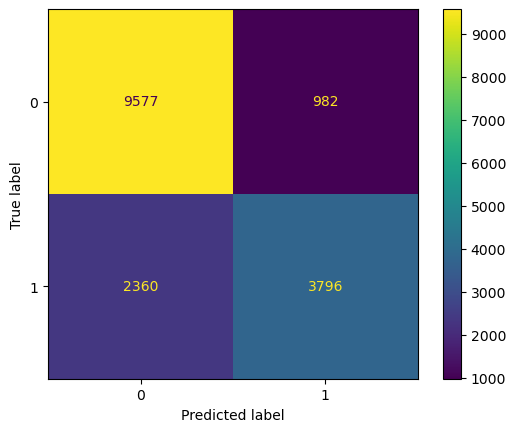

In [37]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

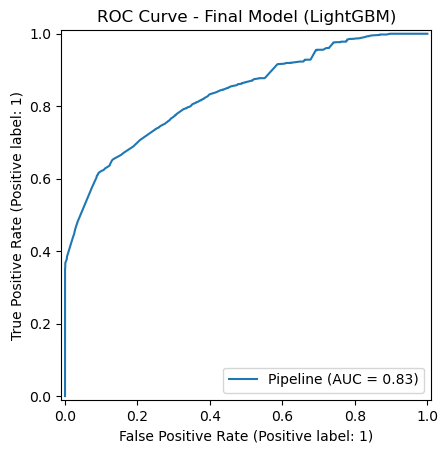

In [38]:
# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve - Final Model (LightGBM)")
plt.show()

## Kesimpulan Model Klasifikasi

##### **Classification Report**

Berdasarkan hasil **classification report** dari model, kita dapat menyimpulkan bahwa kinerja per kelas adalah sebagai berikut :
- Kelas 0 (Tidak Membatalkan): Model bekerja dengan baik untuk kelas ini. Skor F1 adalah 0.85, yang menunjukkan keseimbangan yang baik antara precision (80%) dan recall (90%).
- Kelas 1 (Membatalkan): Model memiliki kinerja yang lebih rendah untuk kelas ini. Skor F1 adalah 0.69, dengan precision 78% dan recall 62%. Ini berarti model cukup akurat ketika memprediksi pembatalan, tetapi melewatkan sebagian besar pembatalan aktual.

##### **Confusion Matrix**

Berdasarkan **confusion matrix** yang diperoleh : 
- **True Negatives (TN)** : 9499 (Berhasil memprediksi tidak ada pembatalan)
- **False Positives (FP)** : 1060 (Salah memprediksi pembatalan)
- **False Negatives (FN)** : 2327 (Salah memprediksi tidak ada pembatalan)
- **True Positives (TP)** : 3829 (Berhasil memprediksi pembatalan)

Ini menunjukkan bahwa model secara keseluruhan cukup baik dalam membedakan antara pelanggan yang akan membatalkan dan yang tidak, seperti yang ditunjukkan oleh ROC AUC yang baik.

Namun, model memiliki F1-skor yang lebih rendah untuk Kelas 1 karena recall yang lebih rendah. Ini berarti model cenderung melewatkan pembatalan aktual. Karena kita ingin menyeimbangkan precision dan recall, ini adalah area yang perlu diperhatikan.

##### **ROC Curve dan AUC Score**

Dari hasil **ROC AUC Score** sebesar **0.843**, kita dapat menyimpulkan bahwa model ini menunjukkan kinerja yang cukup baik secara keseluruhan. Akurasi model adalah 80%, dan yang lebih penting, model mencapai skor ROC AUC sebesar 0.834. Ini menunjukkan bahwa model memiliki kemampuan yang baik untuk membedakan antara pelanggan yang akan membatalkan dan yang tidak.


#### **Simulasi Biaya Pembatalan Hotel : Dengan dan Tanpa Model Prediksi**

##### Asumsi :

- Total reservasi = **200**
  - 100 tamu akan membatalkan
  - 100 tamu tidak membatalkan
- Kerugian rata-rata per pembatalan (termasuk tarif harian rata rata,  biaya operasional dan administrasi, dsb) = **$185**      
(berdasarkan sumber dari https://www.costar.com/article/2000387758/us-hotels-posted-record-high-average-daily-rate-revenue-per-available-room-in-2023?utm_source=chatgpt.com)
- Model klasifikasi hasil evaluasi:
  - **Recall (class 1 - pembatalan)** = `0.62`
  - **Precision (class 1 - pembatalan)** = `0.78`

##### Skenario 1 : Tanpa Model

Semua reservasi tetap diproses, tidak ada intervensi. Maka :
- Pembatalan terjadi sebanyak **100** → tidak ada yang dicegah
- Kerugian total : `100 × $185 = $18,500`

##### Skenario 2 : Dengan Model Prediksi

Model digunakan untuk mendeteksi siapa yang akan membatalkan.    
- True Positive (Benar terdeteksi sebagai pembatalan)
    - Recall = 0.62 → `62` dari 100 pembatalan berhasil diprediksi
    - Maka pembatalan dapat dicegah dengan strategi khusus
    - **Penghematan: `62 × $185 = $11,470`**

- False Positive (Salah deteksi : tamu tidak membatalkan tapi diprediksi akan membatalkan)
    - Precision = 0.78 → untuk menghasilkan 62 TP
    - Total prediksi pembatalan = `62 / 0.78 ≈ 80`
    - False Positive = `80 - 62 = 18`
    - Artinya 18 tamu tidak diberi layanan padahal mereka tidak akan membatalkan
    - Kerugian pendapatan : `18 × $185 = $3,330`


##### Rangkuman :

| Keterangan                             | Jumlah Orang | Biaya per Orang | Total Kerugian / Penghematan     |
| -------------------------------------- | ------------ | --------------- | -------------------------------- |
| Tanpa model → Semua pembatalan         | 100          | \$185           | **\$18,500** kerugian total      |
| Dengan model → Pembatalan dicegah      | 62           | \$185           | **\$11,470** penghematan         |
| Dengan model → Salah blok (False Pos.) | 18           | \$185           | **\$3,330** kerugian baru        |
| **Net saving (penghematan bersih)**    |              |                 | **\$11,470 - \$3,330 = \$8,140** |

Kesimpulan :

- Menggunakan model prediksi dengan **recall 62%** dan **precision 78%** tetap memberikan dampak finansial yang signifikan.
- Penghematan bersih sebesar **$8,140** dari hanya **200 reservasi**.
- Kerugian terbesar berasal dari **kehilangan pendapatan kamar**, sehingga memprediksi dan mencegah pembatalan adalah strategi bisnis yang sangat layak diterapkan.

## Rekomendasi

##### **Rekomendasi Data :**
Berdasarkan dataset yang tersedia, berikut adalah hal-hal yang bisa ditingkatkan untuk mendukung prediksi :
- Isi missing value dan standarisasi kode negara pada kolom country
- Bisa kelompokkan kolom country berdasarkan lokasi geografis untuk menyederhanakan variabel
- Ada banyak data outlier numerik, terutama pada kolom days_in_waiting_list, bisa dianalisis lebih lanjut terkait kesalahan input yg mungkin terjadi, atau bisa dibinning agar lebih mudah dipahami model.
- Fitur temporal seperti tanggal pemesanan atau tanggal check in mungkin bisa jadi insight menarik.

##### **Rekomendasi Model :**
Evaluasi saat ini :
| Metric           | Class 1 (Cancel)                           | Catatan                                                                 |
| ---------------- | ------------------------------------------ | ----------------------------------------------------------------------- |
| Precision        | 0.78                                       | 78% dari prediksi pembatalan memang benar — cukup baik.                 |
| Recall           | 0.62                                       | Baru bisa menangkap 62% dari seluruh pembatalan — masih bisa ditingkat. |
| F1-Score         | 0.69                                       | Seimbang, digunakan sebagai metrik utama.                               |
| AUC ROC          | 0.834                                      | Baik. Model cukup mampu membedakan antara dua kelas.                    |
| Confusion Matrix | TP = 3829, FN = 2327, FP = 1060, TN = 9499 | Proporsi kesalahan dan kebenaran cukup seimbang.                        |

Beberapa cara yang mungkin meningkatkan performa model :
- Cost-sensitive Learning : tambahkan bobot/penalti lebih besar pada kesalahan FN (pembatalan yang tidak terdeteksi).
- Feature engineering tambahan : buat interaction features seperti deposit_type × market_segment.
- Coba ensemble stack (misal LightGBM + Logistic + CatBoost).
- Feature selection dengan SHAP untuk interpretabilitas.
- Hyperparameter tuning lebih agresif dengan Optuna atau Bayesian Optimization.